<p style="font-family: Arial; font-size:3em;color:green;"> Target Encoding </p>

<p style="font-family: Arial; font-size:1.4em;color:gold;"> Boost any categorical feature with this powerful technique. </p>

<p style="font-family: Arial; font-size:1.4em;"> A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target. A simple and effective version is to apply a group aggregation </p>

In [1]:
import pandas as pd

autos = pd.read_csv("module2.csv")

autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

autos[["make", "price", "make_encoded"]].head(20)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


<p style="font-family: Arial; font-size:1.4em;"> An encoding like this presents a couple of problems.Target encodings create a special risk of overfitting, which means they need to be trained on an independent "encoding" split. When you join the encoding to future splits, Pandas will fill in missing values for any categories not present in the encoding split. </p>

<p style="font-family: Arial; font-size:1.4em;color:green;"> 1. Unknown categories which did not exist in dataset </p>
<p style="font-family: Arial; font-size:1.4em;color:green;"> 2. Rare categories. When a category only occurs a few times in the dataset, any statistics calculated on its group are unlikely to be very accurate.  </p>

<p style="font-family: Arial; font-size:3em;color:green;"> A solution to these problems is to handle both Issues. The idea is to blend the category_average with the overall_dataset_average. Rare categories get less weight on their category_average, while missing categories just get the overall_dataset_average. </p>

<p style="font-family: Arial; font-size:1.4em;color:green;"> In pseudocode: </p>

```python
encoding = weight * category_average + (1 - weight) * overall_dataset_average
```

<p style="font-family: Arial; font-size:1.4em;color:green;"> where weight is a value between 0 and 1 calculated from the category frequency.An easy way to determine the value for weight is to compute an m-estimate: </p>

```python
weight = n / (n + m)
```

<p style="font-family: Arial; font-size:1.4em;color:green;"> where n is the total number of times that category occurs in the data. The parameter m determines the "smoothing factor". Larger values of m put more weight on the overall estimate. Basic Maths  </p>

<p style="font-family: Arial; font-size:1.4em;color:green;"> In the Automobiles dataset there are three cars with the make chevrolet. If you chose m=2.0, then the chevrolet category would be encoded with 60% of the average Chevrolet price plus 40% of the overall average price.</p>

```python
let's assume m=2
weight = 3/3+2 = 3/5 = 0.6
category_average = 6007.00 (# average price when make_column == chevrolet)
overall_dataset_average = 13285.03 (# average price for the entire dataset )
chevrolet_encoding = 0.6 * 6007.00 + 0.4 * 13285.03
```

<p style="font-family: Arial; font-size:2.4em;color:green;"> Example - MovieLens1M Dataset </p>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("module3.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [8]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [9]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

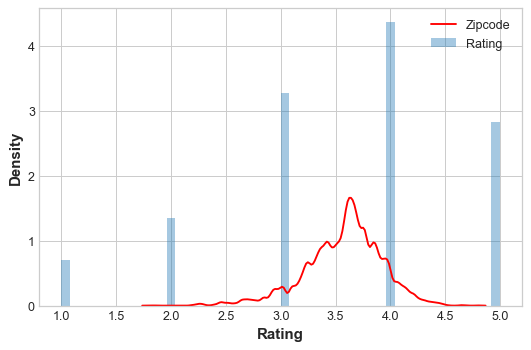

In [6]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);
